<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/%231%20ALK%20-%20213BTMRVP%20Inferential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [15]:
data = pd.read_csv('alk rvp csv.csv', index_col = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2708 entries, 2014-09-16 to 2022-05-17
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RVP_LAB         2708 non-null   float64
 1   S.B5.213TI2804  2708 non-null   float64
 2   S.B5.213PI2806  2708 non-null   float64
dtypes: float64(3)
memory usage: 84.6+ KB


In [16]:
data.describe()

,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
count,2708.000000,2708.000000,2708.000000
mean,39.308013,133.891091,334.424118
std,3.406074,3.422030,28.484351
min,28.500000,105.853689,292.973607
25%,37.400000,131.939385,318.607127
50%,39.000000,133.354756,325.347806
75%,40.700000,135.993672,337.901784
max,98.600000,144.626507,485.531928


In [17]:
data

,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
2014-09-16,35.5,137.368850,332.370196
2014-09-17,33.5,138.363550,342.267734
2014-09-18,34.4,138.571868,339.821023
2014-09-19,34.3,137.795705,333.793957
2014-09-20,35.2,137.670243,343.080718
...,...,...,...
2022-05-13,43.7,127.476079,323.895694
2022-05-14,49.9,123.268204,319.940443
2022-05-15,48.7,124.538121,330.261808
2022-05-16,51.0,121.942983,327.401312


In [18]:
data.columns = ['RVP_LAB', 'TI2804', 'PI2806']
data = data[data['RVP_LAB'] < 60]
data

,RVP_LAB,TI2804,PI2806
2014-09-16,35.5,137.368850,332.370196
2014-09-17,33.5,138.363550,342.267734
2014-09-18,34.4,138.571868,339.821023
2014-09-19,34.3,137.795705,333.793957
2014-09-20,35.2,137.670243,343.080718
...,...,...,...
2022-05-13,43.7,127.476079,323.895694
2022-05-14,49.9,123.268204,319.940443
2022-05-15,48.7,124.538121,330.261808
2022-05-16,51.0,121.942983,327.401312


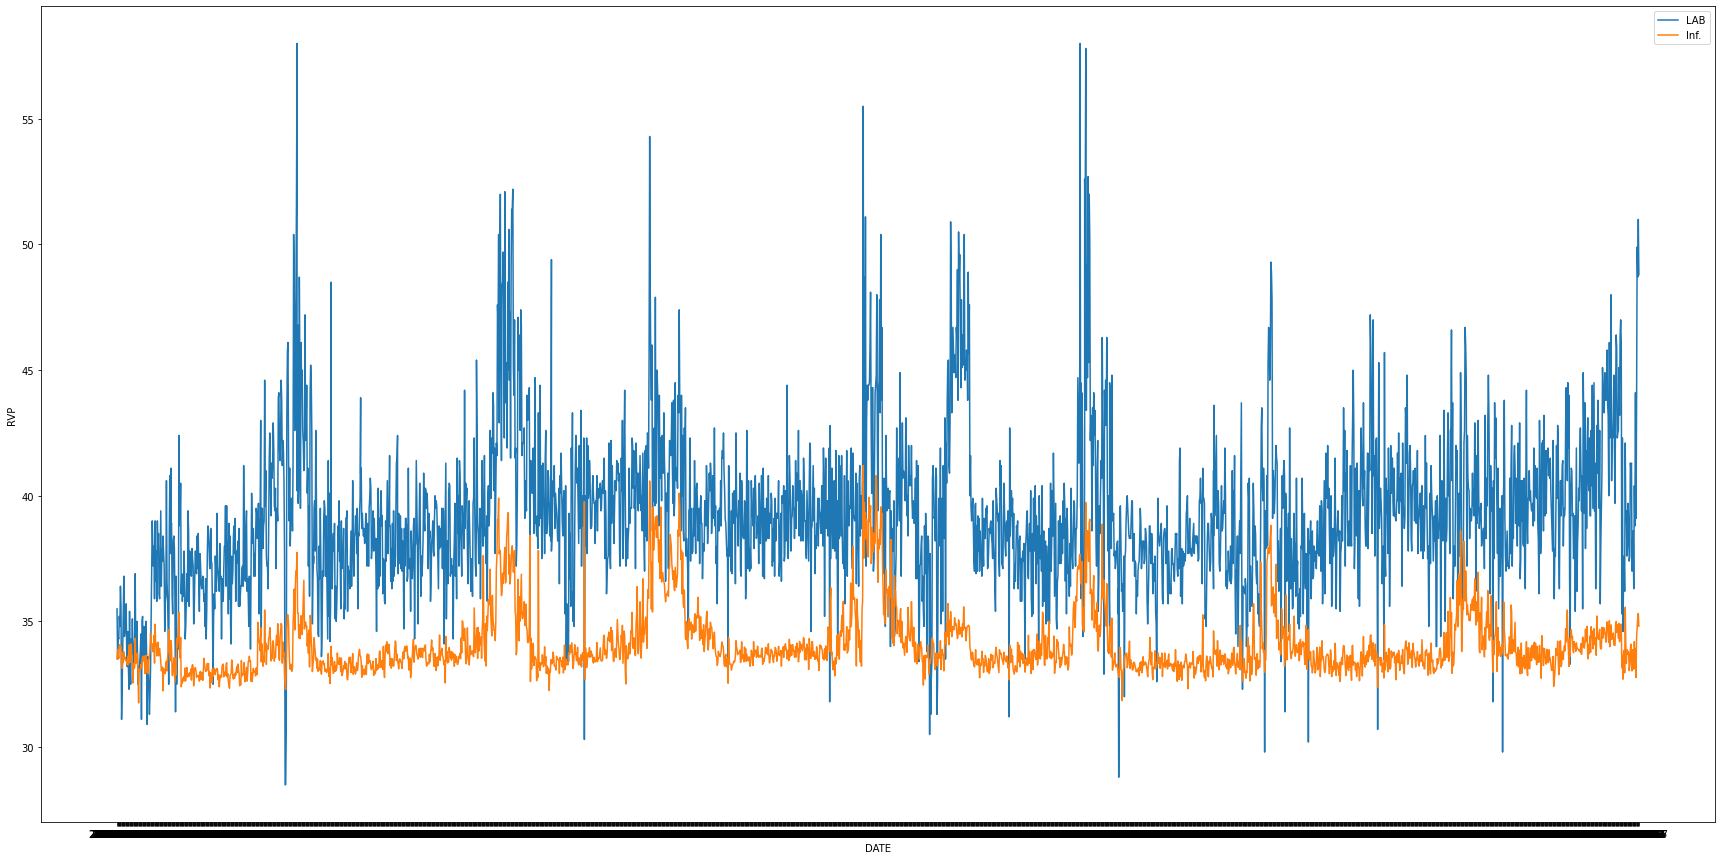

In [21]:
a1 = -0.1343
a2 = 0.0520
b = 34.671
inferential = a1 * data['TI2804'] + a2 * data['PI2806'] + b

plt.figure(figsize = (30, 15))
plt.plot(data['RVP_LAB'], label = 'LAB')
plt.plot(inferential, label = 'INFERENTIAL')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [22]:
input = data[['TI2804', 'PI2806']]
input

,TI2804,PI2806
2014-09-16,137.368850,332.370196
2014-09-17,138.363550,342.267734
2014-09-18,138.571868,339.821023
2014-09-19,137.795705,333.793957
2014-09-20,137.670243,343.080718
...,...,...
2022-05-13,127.476079,323.895694
2022-05-14,123.268204,319.940443
2022-05-15,124.538121,330.261808
2022-05-16,121.942983,327.401312


In [24]:
target = data[['RVP_LAB']]
target

,RVP_LAB
2014-09-16,35.5
2014-09-17,33.5
2014-09-18,34.4
2014-09-19,34.3
2014-09-20,35.2
...,...
2022-05-13,43.7
2022-05-14,49.9
2022-05-15,48.7
2022-05-16,51.0


In [25]:
train_input, test_input, train_target, test_target = tts(input, target, test_size = 0.2)

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.45988926502894667
0.5335456043152242


In [26]:
print(lr.coef_)
print(lr.intercept_)

[[-0.58178952  0.08937833]]
[87.31105075]


In [30]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

lr_ss = LinearRegression()
lr_ss.fit(train_scaled, train_target)
print(lr_ss.score(train_scaled, train_target))
print(lr_ss.score(test_scaled, test_target))
print(lr_ss.coef_)
print(lr_ss.intercept_)

0.45988926502894667
0.5335456043152246
[[-1.97270848  2.52681782]]
[39.2935305]


In [31]:
mm = MinMaxScaler()
mm.fit(train_input)
train_scaled = mm.transform(train_input)
test_scaled = mm.transform(test_input)

lr_mm = LinearRegression()
lr_mm.fit(train_scaled, train_target)
print(lr_mm.score(train_scaled, train_target))
print(lr_mm.score(test_scaled, test_target))
print(lr_mm.coef_)
print(lr_mm.intercept_)

0.45988926502894656
0.5335456043152246
[[-22.55761915  17.21054162]]
[51.91197665]


In [ ]:
a1 = lr.coef_[0]
a2 = lr.coef_[1]
b = lr.intercept_
result = a1 * train_input['TI2804'] + a2 * train_input['PI2806'] + b
result.sort_index()

1       37.383952
2       37.046184
5       38.076656
6       38.475608
7       38.403483
          ...    
2625    42.069202
2626    40.571114
2627    41.545034
2628    42.833230
2629    40.769900
Length: 2102, dtype: float64

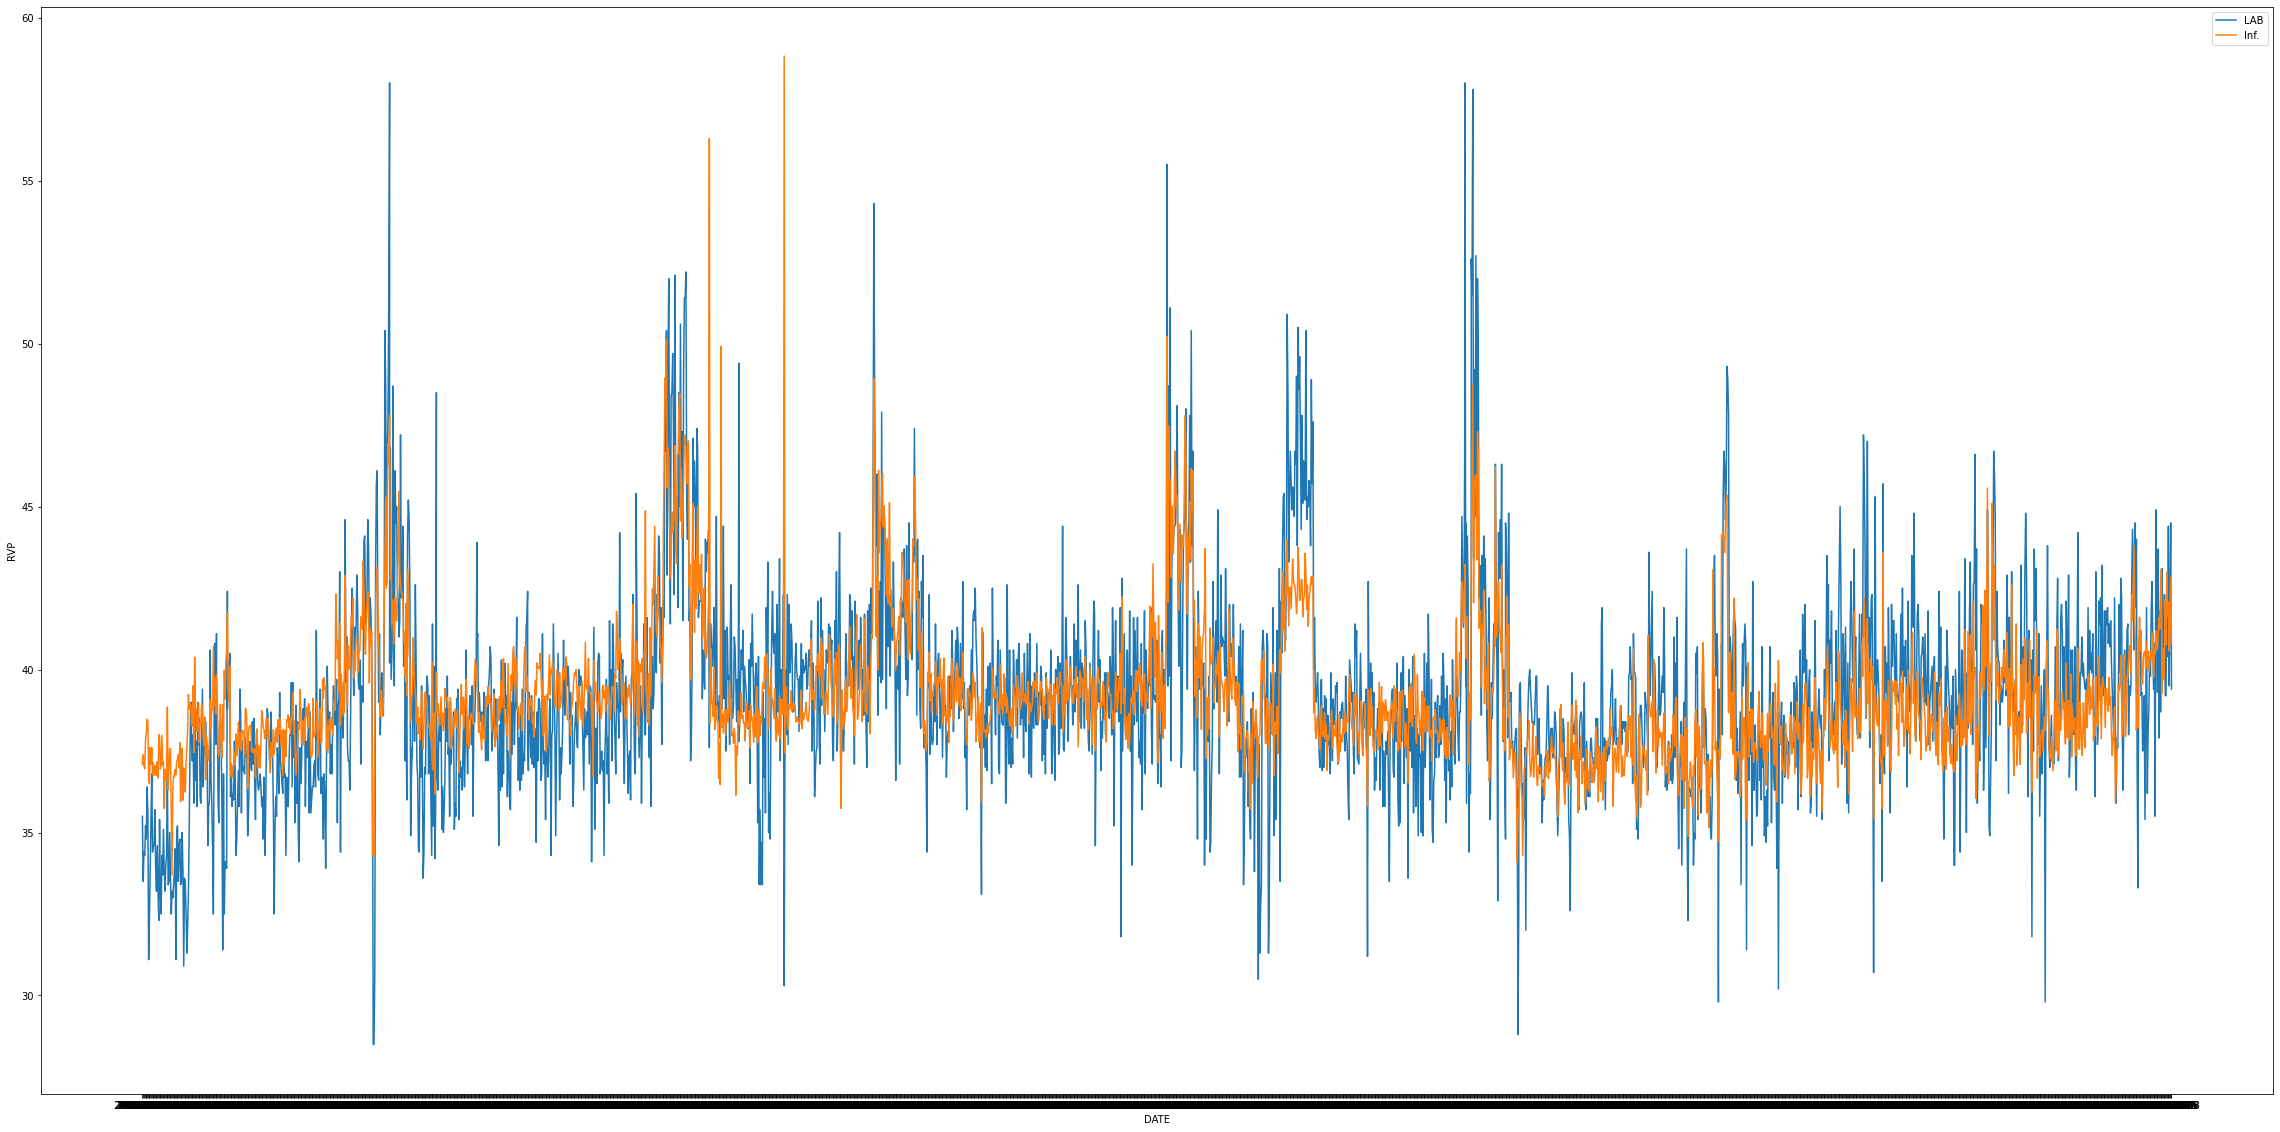

In [ ]:
plt.figure(figsize = (40, 20))
plt.plot(data['DATE'], data['RVP_LAB'], label = 'LAB')
plt.plot(data['DATE'], a1 * data['TI2804'] + a2 * data['PI2806'] + b, label = 'Inf.')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [ ]:
train_input_with_date.sort_index()

,DATE,TI2804,PI2806
0,2014-09-16,137.368850,332.370196
1,2014-09-17,138.363550,342.267734
2,2014-09-18,138.571868,339.821023
3,2014-09-19,137.795705,333.793957
4,2014-09-20,137.670243,343.080718
...,...,...,...
2625,2022-02-24,128.563951,330.977679
2626,2022-02-25,129.419033,319.675153
2627,2022-02-26,128.297302,323.319369
2628,2022-02-27,126.842403,328.328110


In [ ]:
test_input_with_date

,DATE,TI2804,PI2806
1989,2020-06-01,133.814591,323.861023
1580,2019-03-21,133.720352,327.538269
1634,2019-05-14,136.740265,334.737457
1555,2019-02-24,133.750427,315.113342
2230,2021-01-26,131.857605,323.118378
...,...,...,...
2112,2020-09-30,137.672119,341.812988
1662,2019-06-11,133.121124,323.577728
1240,2018-04-15,133.259674,339.147919
858,2017-03-24,133.008194,319.217682
